In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv('train9.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
# print(train_labels)

train_features = df.iloc[:,:22]
train_features = np.array(train_features)
# print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('test9.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
# print(test_labels)

test_features = df.iloc[:,:22]
test_features = np.array(test_features)
# print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

train_features (1440, 22)
train_labels (1440,)
test_features (160, 22)
test_labels (160,)


In [20]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-200
    for nearest_neighbor in range(1,101):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy > rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)
print('accuracy：',rel_pre)

rel_knn_algorithm： ball_tree
rel_weight： distance
rel_nearest_neighbor： 4
accuracy： 0.99375


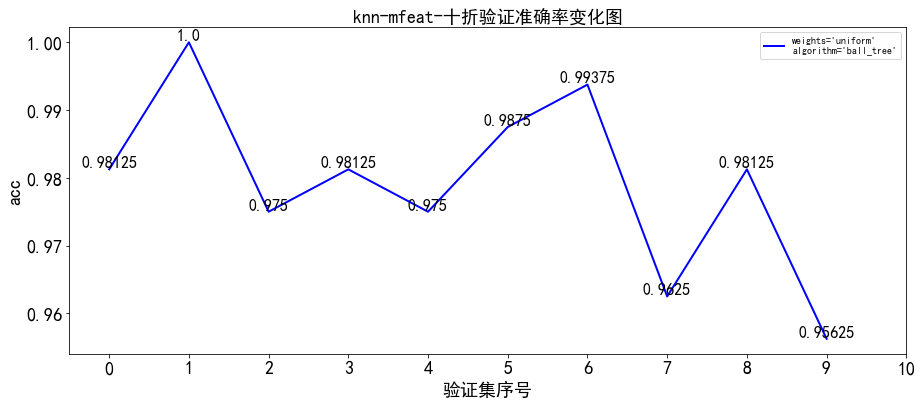

In [28]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

#X轴，Y轴数据
x = [0,1,2,3,4,5,6,7,8,9]
y = [0.98125,1.0,0.975,0.98125,0.975,0.9875,0.99375,0.9625,0.98125,0.95625]
y = [0.9625,0.98125,0.98125,0.98125,0.975,0.975,0.99375,0.94375,0.9875,0.99375]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,label="weights='uniform'\nalgorithm='ball_tree'")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("验证集序号",size=18) #X轴标签
plt.ylabel("acc",size=18)  #Y轴标签
plt.title("knn-mfeat-十折验证准确率变化图",size=18) #图标题
plt.legend()  # 让图例生效
# 设置数字标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom',size=16)
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,10)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白

plt.savefig("knn-mfeat-十折验证.png") #保存图
plt.show()  #显示图

In [29]:
mean(y)

0.9793750000000001

In [23]:
import numpy as np
from pylab import *    
y = [0.9625,0.98125,0.98125,0.98125,0.975,0.975,0.99375,0.94375,0.9875,0.99375]
mean(y)

0.9775